In [2]:
import pandas as pd
import numpy as np

In [3]:
!pip install numpy==1.22.0

   ---------------------------------------- 14.7/14.7 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyportfolioopt 1.5.5 requires numpy<2.0.0,>=1.22.4, but you have numpy 1.22.0 which is incompatible.
streamlit 1.21.0 requires pandas<2,>=0.25, but you have pandas 2.0.3 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from scipy import stats

In [14]:
Filepath = "traffic.csv"
df = pd.read_csv(Filepath)

In [6]:
#Columns, #rows
df.shape

(226278, 9)

In [7]:
#Printing the first five rows
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


##### Question-1
##### Which links received the highest number of clicks?

In [11]:
# Grouping the data by 'linkid' to see which links received the highest number of clicks
link_clicks = df[df['event'] == 'click'].groupby('linkid').size().reset_index(name='click_count')

# Sorting the links by the number of clicks in descending order
link_clicks_sorted = link_clicks.sort_values(by='click_count', ascending=False)

# Displaying the top 5 links with the highest number of clicks
print(link_clicks_sorted.head())

                                    linkid  click_count
428   2d896d31-97b6-4869-967b-1c5fb9cd4bb8         9692
2058  e849515b-929d-44c8-a505-e7622f1827e9         2198
754   522da5cc-8177-4140-97a7-a84fdb4caf1c         2109
951   681d888a-59ce-4acb-b7c5-95dab0c063d9         1500
1739  c2c876ab-b093-4750-9449-6b4913da6af3         1429


##### Question-2
##### How do the click and pageview events distribute over time (per week/month)?

In [12]:
# First, convert the 'date' column to a datetime object to work with time-based functions
df['date'] = pd.to_datetime(df['date'])

# Creating a new column 'week' to represent the week of each event
df['week'] = df['date'].dt.isocalendar().week

# Creating a new column 'month' to represent the month of each event
df['month'] = df['date'].dt.month

# Grouping the data by 'week' and 'event' to count the number of click and pageview events per week
weekly_distribution = df.groupby(['week', 'event']).size().unstack(fill_value=0)

# Grouping the data by 'month' and 'event' to count the number of click and pageview events per month
monthly_distribution = df.groupby(['month', 'event']).size().unstack(fill_value=0)

# Displaying the distribution
print("Weekly Event Distribution:")
print(weekly_distribution)

print("\nMonthly Event Distribution:")
print(monthly_distribution)


Weekly Event Distribution:
event  click  pageview  preview
week                           
33     33640     85527    17022
34     22092     56488    11509

Monthly Event Distribution:
event  click  pageview  preview
month                          
8      55732    142015    28531


##### Question-3

##### Is there a relationship between countries and clickrates?**

In [16]:
# Filter the dataset for click and pageview events
clicks = df[df['event'] == 'click']
pageviews = df[df['event'] == 'pageview']

# Group by 'country' and count the number of clicks and pageviews per country
clicks_per_country = clicks.groupby('country').size().reset_index(name='click_count')
pageviews_per_country = pageviews.groupby('country').size().reset_index(name='pageview_count')

# Merge the clicks and pageviews dataframes on 'country'
clickrates_per_country = pd.merge(clicks_per_country, pageviews_per_country, on='country', how='inner')

# Calculate clickrate (clicks/pageviews) for each country
clickrates_per_country['clickrate'] = clickrates_per_country['click_count'] / clickrates_per_country['pageview_count']

# Display the top countries with the highest clickrates
clickrates_per_country_sorted = clickrates_per_country.sort_values(by='clickrate', ascending=False)

# Display the result
print(clickrates_per_country_sorted)


              country  click_count  pageview_count  clickrate
86               Iran            6               4   1.500000
139             Palau            2               2   1.000000
166   Solomon Islands            1               1   1.000000
76           Guernsey            1               1   1.000000
115  Marshall Islands            3               3   1.000000
..                ...          ...             ...        ...
193           Uruguay            3              19   0.157895
43         Costa Rica            4              28   0.142857
73            Grenada            1               8   0.125000
46             Cyprus            3              25   0.120000
7             Armenia            6              54   0.111111

[202 rows x 4 columns]


**1. Countries with higher clickrates have users who are more likely to click on a link after viewing the page, indicating stronger engagement.**

**2. Countries with lower clickrates suggest that users may not interact with the links as much, pointing to lower engagement or interest.**

**Interpretation**

Iran (1.5 clickrate): This is the only country where the number of clicks exceeds the number of pageviews, meaning users from Iran clicked more than once on average after viewing the page. This could indicate strong engagement, though the total number of events is relatively low (6 clicks and 4 pageviews).

Palau, Solomon Islands, Guernsey, and Marshall Islands (1.0 clickrate): These countries have a clickrate of 1.0, meaning that users clicked exactly once for every pageview. This suggests that every pageview resulted in a click, indicating high user engagement.

Uruguay (0.16 clickrate): Uruguay has a clickrate of approximately 0.16, meaning only 16% of the pageviews resulted in a click. This suggests lower engagement from users in Uruguay.

Costa Rica, Grenada, Cyprus, and Armenia: These countries have clickrates below 0.2, indicating that fewer than 20% of pageviews resulted in clicks. This points to relatively low engagement from users in these countries.

##### Question-4

##### Is there a seasonal trend in the data (i.e., specific months or holidays where traffic spikes)?

event  click  pageview  preview
month                          
8      55732    142015    28531


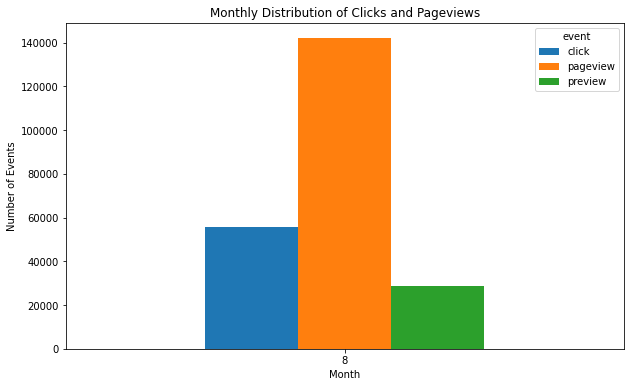

In [17]:
# Step 1: Convert the 'date' column to a datetime object (if not already done)
df['date'] = pd.to_datetime(df['date'])

# Step 2: Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Step 3: Group the data by 'month' and 'event' to count clicks and pageviews for each month
monthly_trend = df.groupby(['month', 'event']).size().unstack(fill_value=0)

# Step 4: Print the monthly trends (clicks and pageviews per month)
print(monthly_trend)

# Step 5: Plot the seasonal trends
import matplotlib.pyplot as plt

# Plotting the monthly distribution of clicks and pageviews
monthly_trend.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Distribution of Clicks and Pageviews')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.show()


##### Question-5
##### How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

We can use the value_counts method to display all unique values of 'event' column and count its occurences. So, the total number of pageview events is this( 1,42,015 ) Opening event for PageView Brings us output into a single line. The other way around is that the data set has to be filtered for pageview events and then display how many rows are in a smaller, one-row dataset (second cell below).

In [13]:
#the data set records three types of events: pageview,click,preview
df["event"].value_counts()

event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64

In [14]:
#the total pageview events is the number of rows where 'event' = 'pageview'
df[df["event"] == "pageview"].shape[0]

142015

Getting the number of pageview events per day requires the application of the groupby method, followed by an aggregate (count) function.

We group the pageview counts by the date and then count their occurrence.

In [18]:
# 1. filter only for 'pageview' events.
# 2. group by the date.
# 3. Keep only the 'event' column, and specify a 'count' aggregation
df[df["event"] == "pageview"].groupby(by="date")["event"].count()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

You can however submit duplicates of the data (i.e., if a single user viewed page 20 times to have that be counted as 20 views). We can use 'df. to make this behaviour a bit more predictable you can use.drop_duplicates() to get the different output. Note that the results in this code differ than before as noted each event then becomes nearly halved and deduplication drops proportionately.

In [19]:
df_deduplicated = df.drop_duplicates()

In [21]:
df_deduplicated["event"].value_counts()

event
pageview    73360
click       32499
preview     16708
Name: count, dtype: int64

In [22]:
df_deduplicated[df_deduplicated["event"] == "pageview"].shape[0]

73360

In [23]:
df_deduplicated[df_deduplicated["event"] == "pageview"].groupby(by="date")["event"].count()

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

##### Question 6
##### What about the other recorded events?

In the first line in the cell below we obtain the set of all unique events in the data. Then, we remove the pageview event because it was already analysed in the previous question. We will deal with whatever events remain.

In [26]:
#get the
#set of recorded events in the data
recorded_events = set(df["event"].unique())
recorded_events

{'click', 'pageview', 'preview'}

In [27]:
#remove the 'pageview' event
recorded_events.remove("pageview")
recorded_events

{'click', 'preview'}

Once we have the other recorded events, we can simply loop over them and apply the same solution from Question 1, adding some informative print statements in the process.

In [29]:
#Loop over each event
for recorded_event in recorded_events:
    #get the total number of occurrences
    total_events = df[df["event"] == recorded_event].shape[0]
    print("Total number of",recorded_event,"events is",total_events,"\n")
    #group by the date and aggregate by count
    data_set = df[df["event"] == recorded_event].groupby(by="date")["event"].count()
    print(recorded_event, "event distribution per day:\n")
    print(data_set, "\n")

Total number of preview events is 28531 

preview event distribution per day:

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64 

Total number of click events is 55732 

click event distribution per day:

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64 



##### Question 7
##### Which countries did the clicks come from?

This question is a bit simpler than the ones before, in the sense that it does not require any groupings or aggregations. The solution consists of two steps:

1. We need to filter for the clicks events only.
2. We can print the unique values of the country column (ignoring any nans)

In [30]:
#filter for the proper event
df_q3 = df[df["event"] == "click"]
pd.DataFrame(data=df_q3["country"].dropna().unique(), columns=["Country"])

,Country
0,Saudi Arabia
1,India
2,France
3,Maldives
4,United States
...,...
197,Guernsey
198,Palau
199,Åland
200,Principality of Monaco


##### Question 8
##### What was the overall click rate (clicks/pageviews)

The click rate is the number of clicks that a page has received (event = 'click') divided by the number of times it has been shown (event = 'pageview'). It is commonly used metric that measures the success of an advertising campaign.

It's calculation requires a few steps.

To start with, we can count the number of times each link has been clicked on, the number of times each link has been viewed. The same procedure applies to both calculations. We first filter for the proper event (click or pageview), then we group the filtered data by the link id and count the occurrences of tha event.

In [32]:
#filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event" : "clicks" #rename column for easier manipulation
})

#do the same for the 'pageviews' events
pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index()
pageviews = pageviews.rename(columns={
    "event" : "pageviews"
})

In [33]:
link_clicks.head()

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [34]:
pageviews.head()

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


To get the answer, we need to somehow join these two DataFrames on the same link Id, and then divide the number of clicks by the number of pageviews to get the required click rate. It can be achieved with Pandas' merge() method. We specify a 'left' and a 'right' Dataframe, a column to merge on, and how the merge should go (we specify 'inner' which takes the intersection of the two data sets).

In [36]:
#pd.merge() does a database-style join of the two dataframe
df_q4 = pd.merge(left=link_clicks, right=pageviews, on="linkid", how="inner")

In [37]:
#define a new column of the 'click_rate'
df_q4["click_rate"] = df_q4["clicks"]/df_q4["pageviews"]

Once we do the merge, we can do column-wise arithmetics to produce a new column that would store the click rate. The cell below points the final data set, providing us with the click rate for each link.

In [38]:
df_q4

,linkid,clicks,pageviews,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


##### Question-9
##### How does the clickrate distribute across different links?

To get a sense of the distribution of the click rate across different links we can use the describe() method. The cell below does that. Observe the output. We can count (number of links), the mean, standard deviation, min, max, as well as the value of the click rate at the 25, 50 and 75th percentile.

In [39]:
df_q4["click_rate"].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click_rate, dtype: float64

Tabular data can only give us so much, so we can try to plot the data and visualize some insights.

Using the plot() method we plot a histogram with 100 bins. Notice how we provide parameters for the figure size and the label of the X-axis. It is always a good idea to have these as they provide make the interpretation of the graphic a lot easier.

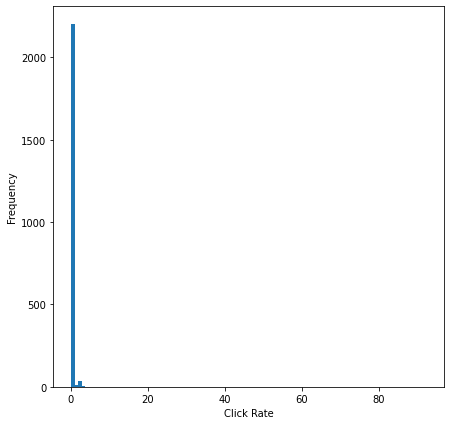

In [40]:
ax = df_q4["click_rate"].plot(kind="hist", figsize=(7,7), bins=100)
_ = ax.set_xlabel("Click Rate")

The histogram shows that the data is highly skewed to left, i.e., many of it's values are very close to zero. In such cases, a common workaround is to plot the histogram of the logarithm of the data. Let us try that, we can use Numpy's log2() method for it!

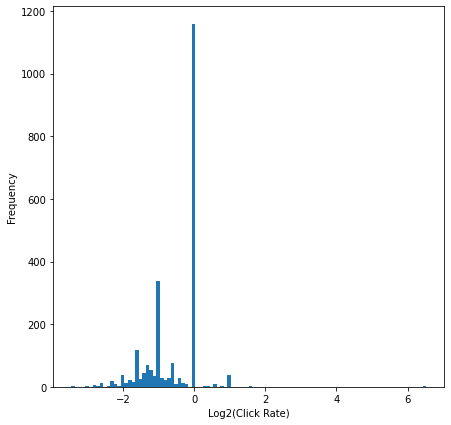

In [42]:
#because the data is highly skewed, it makes more sense to plot the log of it.
df_q4["click_rate_log2"] = np.log2(df_q4["click_rate"])
ax = df_q4["click_rate_log2"].plot(kind="hist", figsize=(7,7), bins=100)
_ = ax.set_xlabel("Log2(Click Rate)")

We observe an enormouss spike at the 0 meaning that the actual click rate was 1, implying that there are many links that have been viewed and clicked exactly once. There are also, many links that have been viewed many times but clicked on fewer (values less than zero). Remember, this plots the logarithm of the actual values, so there is an extra math step in the interpretation here.

One last thing to try is a box plot, which is basically a visualization of the describe() method.

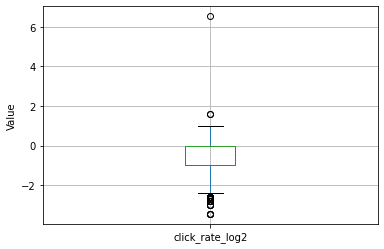

In [43]:
ax = df_q4.boxplot(column="click_rate_log2")
_ = ax.set_ylabel("Value")

We observe two (and one particular) high outliers, and many, many below the Q1 (i.e., click rate very close to zero). Our guess is that there are at least two links, that have been clicked on multiple times in the same page view.

##### Question 10

##### [Pandas and SciPy] Is there any correlation between clicks and previews on a link? Is it significant?How large is the effect?Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

Pearson's correlation coefficient is a measure of linear correlation between two data sets. It takes it's value in the range of [-1,1] and the further it is from  zero, the more significant the correlation is.

Pearson Coefficient is implemented in both Pandas and Scipy, and here we are actually going to use both libraries, just to explore their APIs and to compare results! (should be the same).

First, let us filter data to contain only the click and the preview events. We can describe it to get a sense of the contents.

In [44]:
#filter only events that are relevant to the question
df_q6 = df[df["event"].isin(["click", "preview"])]

In [45]:
df_q6.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,84263,84263,84261,84261,84252,84262,84262,82036,84263
unique,2,7,206,8137,1549,2003,2155,628,2286
top,click,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,55732,12995,18461,8893,15666,15666,15666,15666,15666


Now, we just repeat the same procedure as in Question 4. We create two new columns and append them to the original data.

In [46]:
#filter only 'click' events and group them by the 'linkid' to get their count,
#i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks"
})
#do the same for the 'preview' events
previews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
previews = previews.rename(columns={
    "event":"previews"
})

In [47]:
#perform two database-style joins to append the 
#number of link clicks and previews to each row
df_q6 = pd.merge(left = df_q6, right=link_clicks, how="left", on="linkid")
df_q6 = pd.merge(left = df_q6, right=previews, how="left", on="linkid")

In [49]:
df_q6.dropna(subset=["clicks", "previews"], inplace=True)
df_q6

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
...,...,...,...,...,...,...,...,...,...,...,...
84258,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
84259,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,20.0,14.0
84260,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,235.0,145.0
84261,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109.0,1605.0


Finally, we calculate the correlation coefficient with both pandas and scipy.

In [52]:
print(df_q6.dtypes)

event        object
date         object
country      object
city         object
artist       object
album        object
track        object
isrc         object
linkid       object
clicks      float64
previews    float64
dtype: object


In [53]:
df_q6_numeric = df_q6.select_dtypes(include=[float, int])

In [54]:
df_q6_numeric.dropna(inplace=True)

In [55]:
df_q6_corr = df_q6_numeric.corr()
print(df_q6_corr)

            clicks  previews
clicks    1.000000  0.998713
previews  0.998713  1.000000


In [57]:
stats.pearsonr(x=df_q6["clicks"], y=df_q6["previews"])

(0.9987125072008578, 0.0)

Almost perfectly positive correlation between the number of clicks and previewsd which seems logical, given that the one is actually dependent on the other (can't have clicks without previews and vice versa)

Using pd.factorize() we can quantify the relationship between categorical variables in similar manner as with numerical variables

In [63]:
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]
factorized_df = df_q6[categorical_columns] \
                    .apply(lambda x: pd.factorize(x)[0]) \
                    .corr()
factorized_df


,country,city,artist,album,track
country,1.000000,0.189353,0.018565,0.023316,0.024796
city,0.189353,1.000000,0.103752,0.108283,0.111936
artist,0.018565,0.103752,1.000000,0.946371,0.949177
album,0.023316,0.108283,0.946371,1.000000,0.976958
track,0.024796,0.111936,0.949177,0.976958,1.000000


We observe a positive high correlation between album, atist and track and almost no correlation between other varibles. This is again explained, since those variables are naturally dependent, i.e, each track belongs to an album and is performed by an artist